# 제목 : 미니 프로젝트 : 가위바위보 분류기를 만들자


## 목차
  ### 1> 필요한 라이브러리 정리하기 
  ### 2> 이미지 크기 조정 함수( 28 X 28)
  ####    2-1> 학습데이터 크기 조정
  ####    2-2> 테스트데이터 크기 조정 
  
  ### 3> 이미지에 라벨링 작업함수
  ####   3-1> 라벨링 작업 
  ####   3-2> 라벨링 확인
  
  ### 4> Model Layer 개수 정하기 
  
  ### 5> 채널수에 대한 정보주기 
  
  ### 6> 모델 학습
  
  ### 7> 모델 테스트 
  
  
## 이슈 - 어떤 데이터를 모을 것인가
   ### 1> 첫번째 방법 
    학습데이터는 총 2100개 (한사람의데이터중 8:2로 구분하여 총 7명의 데이터를 구성하여 train:1680 , test:420)
    예시> 김1 (trian 80, test20) , 김2 (trian 80, test20) , 김3 (trian 80, test20)
    <결과> test_loss: 0.34256115555763245 
           test_accuracy: 0.9095237851142883 
           
   ### 2> 두번째 방법
    학습데이터는 총 2100개 (여러사람의 데이터를 구성 train:1680 , train에서 없는 데이터 test:300)
    예시>  김1, 김2, 김3 의 데이터로 학습,  박1 로 테스트데이터 사용 
    
    <결과> test_loss: 7.597764492034912 
           test_accuracy: 0.46000000834465027
     
## 루브릭  평가
 ### 1> 이미지 분류기 모델이 성공적으로 만들어졌는가? 
 ### 2> 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
 ### 3> 분류모델의 test accuracy가 기준 이상 높게 나왔는가? 


## 소감 
     첫번째 실습이기도 하지만 헉 공부를 조금이라도 하고 오길 잘했다는 기분이 듭니다. 
     아이펠에서 말한 "아무것도 몰라요" 라는 말은 뻥이였다. 
     데이터를 여러사람이 모을 수 있어서 좋았고 하나하나 뜯어보고 물어보면 모르겠지만 
     전체적인 흐름은 이런거구나는 알겠다. 
     공부를 열심히 해서 하나하나 뜯어보고 벗겨(?) 보았을때 설명해줄수 있으면 좋겠다. 그런날은 곧 오리라.
  

  



In [29]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np

print("필요한 라이브러리 import 완료!")

필요한 라이브러리 import 완료!


In [30]:
#이미지 크기 조정 함수
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")


In [31]:
#학습데이터 크기 조정

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="./rock_scissor_paper/paper" 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

560  images to be resized.
560  images resized.
가위 이미지 resize 완료!
560  images to be resized.
560  images resized.
바위 이미지 resize 완료!
560  images to be resized.
560  images resized.
보 이미지 resize 완료!


In [34]:
#테스트 데이터 크기 조정
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper_test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper_test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="./rock_scissor_paper_test/paper" 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

140  images to be resized.
140  images resized.
가위 이미지 resize 완료!
140  images to be resized.
140  images resized.
바위 이미지 resize 완료!
140  images to be resized.
140  images resized.
보 이미지 resize 완료!


In [38]:
# 이미지에 라벨링 작업함수
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



In [39]:
#라벨링 작업
#train
image_dir_path =  "./rock_scissor_paper/"
(x_train, y_train)=load_data(image_dir_path,1680)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

#test 
image_dir_path =  "./rock_scissor_paper_test/"
(x_test, y_test)=load_data(image_dir_path,420)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 1680 입니다.
x_train shape: (1680, 28, 28, 3)
y_train shape: (1680,)
학습데이터(x_train)의 이미지 개수는 420 입니다.
x_test shape: (420, 28, 28, 3)
y_test shape: (420,)


라벨:  0


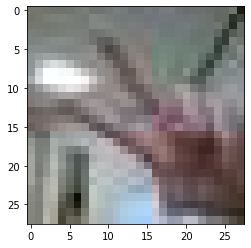

In [20]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

라벨:  2


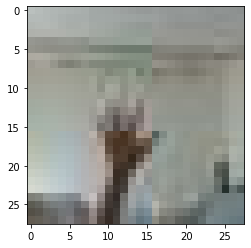

In [22]:
plt.imshow(x_test[400])
print('라벨: ', y_test[400])

In [44]:
#Model Layer 개수 정하기 
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (

In [45]:
#  채널수에 대한 정보주기 
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (1680, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (1680, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [64]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=100)

Epoch 1/100
53/53 [==============================] - 0s 3ms/step - loss: 2.8975e-04 - accuracy: 1.0000
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9917
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9970
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9988
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9952
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 2.2993e-04 - accuracy: 1.0000
Epoch 8/100
53/53 [==============================] - 0s 3ms/step - loss: 7.5675e-05 - accuracy: 1.0000
Epoch 9/100
53/53 [==============================] - 0s 3ms/step - loss: 5.9419e-05 - accuracy: 1.0000
Epoch 10/100
53/53 [==============================] - 0s 3ms/step - loss: 5.2609e-05 - accura

라벨:  2
14/14 - 0s - loss: 0.3426 - accuracy: 0.9095
test_loss: 0.34256115555763245 
test_accuracy: 0.9095237851142883


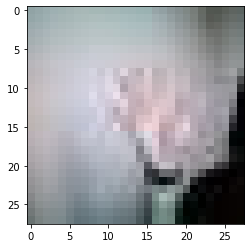

In [27]:
# 불러온 이미지 확인

plt.imshow(x_test[300])
print('라벨: ', y_test[300])

# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

### 데이터 두번째 방법 ( 학습데이터와 테스트데이터를 완전 별개의 데이터로 분류)
     예> 김1, 김2, 김3 의 데이터로 학습,  박1 로 테스트데이터 사용 

In [37]:
#테스트 데이터 크기 조정
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper_test2/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper_test2/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="./rock_scissor_paper_test2/paper" 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [42]:
#test 
image_dir_path =  "./rock_scissor_paper_test2/"
(x_test, y_test)=load_data(image_dir_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  2


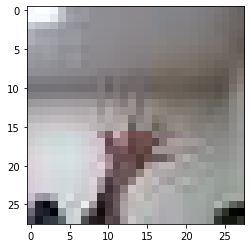

In [43]:
plt.imshow(x_test[200])
print('라벨: ', y_test[200])

In [46]:
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

라벨:  2
10/10 - 0s - loss: 7.5978 - accuracy: 0.4600
test_loss: 7.597764492034912 
test_accuracy: 0.46000000834465027


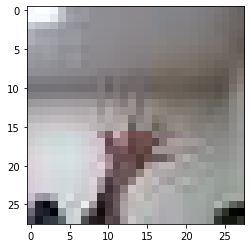

In [65]:
# 불러온 이미지 확인

plt.imshow(x_test[200])
print('라벨: ', y_test[200])

# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))